In [1]:
#import all packages used in this section
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

In [2]:
#import the dataset
train=pd.read_csv("train.csv",index_col="Id")
dataset=train
gesamt_var=list(dataset.columns.values)
#show a preview of first 5 rows of the dataset
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
#show information to all variables
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [3]:
#define a function to check where and how many null values exist before we prepare the dataset

def check_null(df):
    all_null=list(dataset.columns.values)
    full_labels=dataset.isnull().sum()
    observations=len(dataset)
    count=0
    print("Variable and missing value count:")
    for i,a in sorted(zip(full_labels,all_null),reverse=True):
        if i>0:
            print(a,": ")
            print("absolute missing:",i," = ",int((i/observations*100)),"%","\n")
        count+=1
    print("total number of variables in dataset:")
    print(count)
    sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [4]:
"""
categorize all variables in categorical, numerical, boolean and nominal for further processing.
quality variables are categorical variables that share categories and ordering

"""

#interaction terms:
# MoSold YrSold, 'GarageQual' 'GarageArea',


categorical=['BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical',
             'Fence','GarageFinish','PavedDrive','Utilities']
quality=['BsmtQual','BsmtCond','ExterCond','GarageQual','HeatingQC','KitchenQual','PoolQC','FireplaceQu','GarageCond','ExterQual']
nominal=['Alley',"Neighborhood","MiscFeature",'SaleCondition','BldgType','Condition1','Condition2',
         'Exterior1st','Exterior2nd','Foundation','Functional','GarageType','GarageYrBlt','Heating','LandContour',
         'LandSlope','LotConfig','LotShape','MSSubClass','MSZoning','MasVnrType','MoSold','RoofMatl',
         'RoofStyle','Street','YearBuilt','YearRemodAdd','YrSold','SaleType','HouseStyle']

numerical=['BsmtFinSF1',"BsmtFinSF2","EnclosedPorch",'Fireplaces','FullBath','GarageArea','GarageCars','GrLivArea','HalfBath',
           'KitchenAbvGr','LotArea','LotFrontage','LowQualFinSF','MasVnrArea','MiscVal','OpenPorchSF',
           'OverallCond','OverallQual','PoolArea','ScreenPorch','TotRmsAbvGrd','TotalBsmtSF','WoodDeckSF','BedroomAbvGr',
           'BsmtUnfSF','BsmtHalfBath','BsmtFullBath','3SsnPorch','2ndFlrSF','1stFlrSF']

boolean=['CentralAir']


types=[categorical,quality,nominal,numerical,boolean]
map_types=[categorical,quality,boolean]

In [5]:
"""
create new variables and interactions for age variables to capture the age of the house at the time it is sold

"""

#create age variables to transform nominal variables into numerical
dataset["total_age"]=dataset['YrSold']-dataset['YearBuilt']
dataset["age_remod"]=dataset['YrSold']-dataset['YearRemodAdd']
dataset["age_garage"]=dataset["YrSold"]-dataset['GarageYrBlt']

In [6]:
"""
Transform all nominal variables to make them computer processible
the dataset consists the following types of variables:

categorical
quality (a type of categorical)
and boolean (yes/no)

"""

#masks to transform categorical variables:

#BSmtExposure
bsmtExposure_map={"No":0,"NaN":0,"Mn":1,"Av":2,"Gd":3}
#BsmtFInType
bsmtFinType_map={"nan":0,"Unf":1,"LwQ":2,"Rec":3,"BLQ":4,"ALQ":5,"GLQ":6}
#Electrical
electrical_map={"Mix":0,"FuseP":1,"FuseF":2,"FuseA":3,"SBrkr":4}
#fence
fence_map={"nan":0,"MnWw":1,"GdWo":2,"MnPrv":3,"GdPrv":4}
#garagefinish
garageFinish_map={"nan":0,"Unf":1,"RFn":2,"Fin":3}
#PavedDrive
pavedDrive_map={"N":0,"P":1,"Y":2}
#Utilities
utilities_map={"nan":0,'NoSeWa':1,'AllPub':2}

#masks to transform for quality variables, quality variables can take the following values
"""
Ex Excellent
Gd Good
TA Average/Typical
FA Fair
NA No Pool
Po
"""
quality_map={"Na":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5}

#mask for boolean - yes/no variables
boolean_map={"Y":1,"N":0}


# mask to match all variables its suitable mask to transform the variables
map_function={"BsmtExposure":bsmtExposure_map,"BsmtFinType1":bsmtFinType_map,"BsmtFinType2":bsmtFinType_map,'CentralAir':boolean_map,
             'BsmtQual':quality_map,'ExterCond':quality_map,'GarageQual':quality_map,'HeatingQC':quality_map,
              'KitchenQual':quality_map,'BsmtCond':quality_map,'PoolQC':quality_map,'FireplaceQu':quality_map,'GarageCond':quality_map,
              'ExterQual':quality_map,"Electrical":electrical_map,"Fence":fence_map,"GarageFinish":garageFinish_map,"PavedDrive":pavedDrive_map,"Utilities":utilities_map}


In [7]:
# apply the masks to every variable category
for i in types:
    for a in i:
        if a in map_function:
            dataset[a]=dataset[a].map(map_function[a])

In [8]:
# transform the time variables to include them as dummy variables later on, rather than having them as numerical value
#since age variables created before can capture that better

dataset["MoSold"]=dataset["MoSold"].apply(str)
dataset['YrSold']=dataset['YrSold'].apply(str)
dataset["GarageYrBlt"]=dataset["GarageYrBlt"].apply(str)

Variable and missing value count:
PoolQC : 
absolute missing: 1453  =  99 % 

MiscFeature : 
absolute missing: 1406  =  96 % 

Alley : 
absolute missing: 1369  =  93 % 

Fence : 
absolute missing: 1179  =  80 % 

FireplaceQu : 
absolute missing: 690  =  47 % 

LotFrontage : 
absolute missing: 259  =  17 % 

age_garage : 
absolute missing: 81  =  5 % 

GarageType : 
absolute missing: 81  =  5 % 

GarageQual : 
absolute missing: 81  =  5 % 

GarageFinish : 
absolute missing: 81  =  5 % 

GarageCond : 
absolute missing: 81  =  5 % 

BsmtFinType2 : 
absolute missing: 38  =  2 % 

BsmtExposure : 
absolute missing: 38  =  2 % 

BsmtQual : 
absolute missing: 37  =  2 % 

BsmtFinType1 : 
absolute missing: 37  =  2 % 

BsmtCond : 
absolute missing: 37  =  2 % 

MasVnrType : 
absolute missing: 8  =  0 % 

MasVnrArea : 
absolute missing: 8  =  0 % 

Electrical : 
absolute missing: 1  =  0 % 

total number of variables in dataset:
83


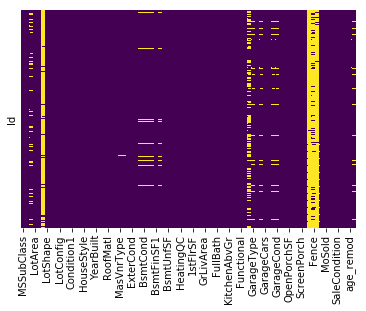

In [10]:
#check how many missing values exist to find a good strategy to impute them
check_null(dataset)

In [9]:
"""
impute missing variables in the dataset


"""




dataset["GarageYrBlt"].fillna(dataset["YearBuilt"],inplace=True);

#fill categorical nan variables as 0 because that means that the question does not apply (there exists no garage)
dataset["BsmtQual"].fillna(0,inplace=True);
dataset["BsmtCond"].fillna(0,inplace=True);
dataset["GarageQual"].fillna(0,inplace=True);
dataset["KitchenQual"].fillna(0,inplace=True);
dataset["PoolQC"].fillna(0,inplace=True);
dataset["FireplaceQu"].fillna(0,inplace=True);
dataset["GarageCond"].fillna(0,inplace=True);
dataset["BsmtExposure"].fillna(0,inplace=True);
dataset["BsmtFinType1"].fillna(0,inplace=True);
dataset["BsmtFinType2"].fillna(0,inplace=True);
dataset["Electrical"].fillna(0,inplace=True);
dataset["BsmtFinSF1"].fillna(0,inplace=True);
dataset["Fence"].fillna(0,inplace=True);
dataset["GarageFinish"].fillna(0,inplace=True);
dataset["PavedDrive"].fillna(0,inplace=True);
dataset["Utilities"].fillna(0,inplace=True);


"""
missing variables:
GarageCars 1, BsmtFinSF2 1,LotFrontage 486, TotalBsmtSF 1, age_garage 159
"""
#GarageCars: most frequent value: 2, but area=0 -> insert 0
dataset["GarageCars"].fillna(0,inplace=True);
# many 0 values, maybe 0?
dataset["BsmtFinSF2"].fillna(dataset["BsmtFinSF2"].median(),inplace=True);

#LotFrontage 486 nan
dataset["LotFrontage"].fillna(dataset["LotFrontage"].median(),inplace=True)

#TotalBsmtSF 1 nan
dataset["TotalBsmtSF"].fillna(dataset["TotalBsmtSF"].median(),inplace=True)

#age_garage 159 nan
dataset["age_garage"].fillna(dataset["age_garage"].median(),inplace=True)




dataset["BsmtHalfBath"].fillna(0,inplace=True);
# only in test dataset
dataset["GarageArea"].fillna(0,inplace=True);
dataset["BsmtFullBath"].fillna(0,inplace=True);
dataset["BsmtFinSF1"].fillna(dataset["BsmtFinSF1"].median(),inplace=True);
dataset["BsmtUnfSF"].fillna(dataset["BsmtUnfSF"].median(),inplace=True);
#8 missing values:probably masvnr area = 0
dataset["MasVnrArea"].fillna(0,inplace=True);



#drop Alley, since it has too many NaN values to use it to be useful
dataset.drop("Alley",axis=1,inplace=True)


In [11]:
dataset["Electrical"].unique()

array([ 4.,  2.,  3.,  1.,  0., nan])

In [11]:
# transform nominal variables that are left, and year, month variables dummy variables
print("Anzahl der Variablen vor one-hot-encoding: "+str(len(gesamt_var)))
dataset = pd.get_dummies(dataset)
expanded_var=list(dataset.columns.values)
print("Anzahl der Variablen nach one-hot-encoding: "+str(len(expanded_var)))

Anzahl der Variablen vor one-hot-encoding: 80
Anzahl der Variablen nach one-hot-encoding: 342


Variable and missing value count:
total number of variables in dataset:
342


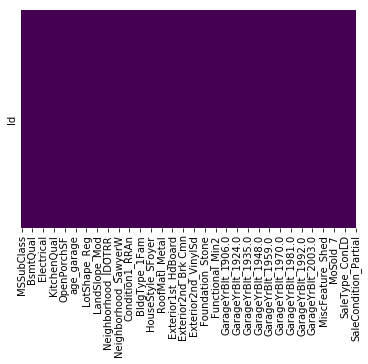

In [12]:
check_null(dataset)

In [26]:
y_train=pd.DataFrame()
y_train["usd/sqm"]=dataset["usd/sqm"]
X_train=pd.DataFrame(dataset.drop("usd/sqm",axis=1))

In [ ]:
#save the dataframe to csv to store changes
X_train.to_csv("X_train.csv", sep=';', encoding='utf-8',index_label="Id")
y_train.to_csv("y_train.csv", sep=';', encoding='utf-8',index_label="Id")

In [15]:
dataset["sqm"]=dataset['TotalBsmtSF']+dataset["GrLivArea"]
dataset["usd/sqm"]=dataset["SalePrice"]/dataset["sqm"]

In [ ]:
drop_list=["sqm","SalePrice","TotalBsmtSF","GrLivArea"]
for i in drop_list:
    dataset.drop(i,axis=1,inplace=True)

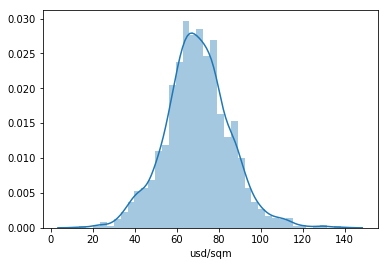

In [18]:
sns.distplot(dataset["usd/sqm"])

In [ ]:
y_train=pd.DataFrame()
y_train["usd/sqm"]=dataset["usd/sqm"]
X_train=pd.DataFrame(dataset.drop("usd/sqm",axis=1))

In [27]:
## to create a dataset to prices/sqrm:
X_train.to_csv("X_train_sqprice.csv", sep=';', encoding='utf-8',index_label="Id")
y_train.to_csv("y_train_sqprice.csv", sep=';', encoding='utf-8',index_label="Id")